In [1]:
# authorize google account to use bigquery
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# authorize drive to pull model
from google.colab import drive
drive.mount('/content/drive')

# pull data for repo from bigquery
project_id = 'uic-capstone-int'
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

Authenticated
Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
mongodb_repos= pd.read_csv('/content/drive/My Drive/Cloudbakers/mongodb_repos.csv')
databricks_repos= pd.read_csv('/content/drive/My Drive/Cloudbakers/databricks_repos.csv')

In [4]:
mongorepoIDs=mongodb_repos['id'].tolist()
dbrepoIDs=databricks_repos['id'].tolist()
repoIDs = mongorepoIDs + dbrepoIDs
id = repoIDs + [50904245, 2211243, 138754790, 33884891, 86057409] #list of most important repos

In [65]:
len(id)

193

# Feature Importance

In [ ]:
df= pd.DataFrame()

for i in range(len(id)):

    print('Reading..........repoID: %d' %id[i])
    sql = '''
    SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, count (*) number_of_pushes
    FROM
    (

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2015
    WHERE type='PushEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2016
    WHERE type='PushEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2017
    WHERE type='PushEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2018
    WHERE type='PushEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2019
    WHERE type='PushEvent' AND repo.id = {0}
    )
    GROUP BY 1,2
    ORDER BY 1;'''.format(id[i])
    dfPushes=client.query(sql).to_dataframe()




    #---------------------------------Forks------------------------------------------

    sql='''
        
    SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, count (*) number_of_forks
    FROM
    (

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2015
    WHERE type='ForkEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2016
    WHERE type='ForkEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2017
    WHERE type='ForkEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2018
    WHERE type='ForkEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2019
    WHERE type='ForkEvent' AND repo.id = {0}
    )
    GROUP BY 1,2
    ORDER BY 1;
    '''.format(id[i])
    dfForks=client.query(sql).to_dataframe()




    #-----------------------------------------Pulls------------------------------------
    sql = '''
    SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, count (*) number_of_pulls
    FROM
    (

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2015
    WHERE type='PullRequestEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2016
    WHERE type='PullRequestEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2017
    WHERE type='PullRequestEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2018
    WHERE type='PullRequestEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2019
    WHERE type='PullRequestEvent' AND repo.id = {0}
    )
    GROUP BY 1,2
    ORDER BY 1;'''.format(id[i])
    dfPulls=client.query(sql).to_dataframe()



    #---------------------------------------Bookmarks-------------------------------------
    sql= '''

    SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, count (DISTINCT actorID) number_of_Bookmarks
    FROM
    (
    SELECT created_at as date, repo.id as repoID, actor.id AS actorID
    FROM githubarchive.year.2015
    WHERE type='WatchEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID, actor.id AS actorID
    FROM githubarchive.year.2016
    WHERE type='WatchEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID, actor.id AS actorID
    FROM githubarchive.year.2017
    WHERE type='WatchEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID, actor.id AS actorID
    FROM githubarchive.year.2018
    WHERE type='WatchEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID, actor.id AS actorID
    FROM githubarchive.year.2019
    WHERE type='WatchEvent' AND repo.id = {0}
    )
    GROUP BY 1,2
    ORDER BY 1;'''.format(id[i])
    dfBoomarks = client.query(sql).to_dataframe()






    #----------------------------Issues---------------------------------------------
    sql = '''
    SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, count (*) number_of_issues
    FROM
    (

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2015
    WHERE type='IssueEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2016
    WHERE type='IssueEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2017
    WHERE type='IssueEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2018
    WHERE type='IssueEvent' AND repo.id = {0}

    UNION ALL

    SELECT created_at as date, repo.id as repoID
    FROM githubarchive.year.2019
    WHERE type='IssueEvent' AND repo.id = {0}
    )
    GROUP BY 1,2
    ORDER BY 1;'''.format(id[i])
    dfIssues=client.query(sql).to_dataframe()






    #-------------------------Issuecomments-------------------------------------------

    sql = '''
    SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, COUNT(*) AS issue_comment_count, COUNT( DISTINCT a_id) as issue_author_count
    FROM 
    (SELECT created_at as date, repo.id as repoID, actor.id AS a_id
    FROM githubarchive.year.2015
    WHERE type = 'IssueCommentEvent' AND repo.id = {0}


    UNION ALL

    SELECT created_at as date, repo.id as repoID, actor.id AS a_id
    FROM githubarchive.year.2016
    WHERE type = 'IssueCommentEvent' AND repo.id = {0}

    UNION ALL



    SELECT created_at as date, repo.id as repoID, actor.id AS a_id
    FROM githubarchive.year.2017
    WHERE type = 'IssueCommentEvent' AND repo.id = {0}

    UNION ALL


    SELECT created_at as date, repo.id as repoID, actor.id AS a_id
    FROM githubarchive.year.2018
    WHERE type = 'IssueCommentEvent' AND repo.id = {0}

    UNION ALL


    SELECT created_at as date, repo.id as repoID, actor.id AS a_id
    FROM githubarchive.year.2019
    WHERE type = 'IssueCommentEvent' AND repo.id = {0}

    )
    GROUP BY 1,2
    ORDER BY 1;'''.format(id[i])
    dfIssuecomment = client.query(sql).to_dataframe()



    #---------------------------------------Commitcomments------------------------------------------
    sql = '''
    SELECT FORMAT_DATETIME("%Y-%m-%d", DATETIME(date)) AS year_month, repoID, COUNT(*) AS commit_comment_count, COUNT( DISTINCT a_id) AS commit_author_count
    FROM 
    (SELECT created_at as date, repo.id as repoID, actor.id AS a_id
    FROM githubarchive.year.2015
    WHERE type = 'CommitCommentEvent' AND repo.id = {0}


    UNION ALL

    SELECT created_at as date, repo.id as repoID, actor.id AS a_id
    FROM githubarchive.year.2016
    WHERE type = 'CommitCommentEvent' AND repo.id = {0}

    UNION ALL



    SELECT created_at as date, repo.id as repoID, actor.id AS a_id
    FROM githubarchive.year.2017
    WHERE type = 'CommitCommentEvent' AND repo.id = {0}

    UNION ALL


    SELECT created_at as date, repo.id as repoID, actor.id AS a_id
    FROM githubarchive.year.2018
    WHERE type = 'CommitCommentEvent' AND repo.id = {0}

    UNION ALL


    SELECT created_at as date, repo.id as repoID, actor.id AS a_id
    FROM githubarchive.year.2019
    WHERE type = 'CommitCommentEvent' AND repo.id = {0}

    )
    GROUP BY 1,2
    ORDER BY 1;'''.format(id[i])

    dfCommitcomment = client.query(sql).to_dataframe()

    merge1 = pd.merge(dfPushes,dfForks,how='outer', on='year_month')
    merge2 = pd.merge(merge1, dfPulls, how='outer', on='year_month')
    merge3 = pd.merge(merge2, dfBoomarks, how='outer', on='year_month')
    merge4 = pd.merge(merge3, dfIssuecomment, how='outer', on='year_month')
    merge5 = pd.merge(merge4,dfCommitcomment,how='outer',on='year_month')
    merge6 = pd.merge(merge5, dfIssues, how='outer',on='year_month')
    merge6.drop(['repoID_x','repoID_y'], axis=1, inplace=True)
    merge6.drop('repoID', axis=1, inplace=True)
    merge6.sort_values(by='year_month',ascending=True,inplace=True)

    merge6['year_month']=pd.to_datetime(merge6['year_month'])
    merge6.rename({'year_month': 'datetime'}, axis=1, inplace=True)
    merge6.index=merge6['datetime']
    merge6.drop('datetime',axis=1,inplace=True)

    WeeklyTS = pd.DataFrame()
    WeeklyTS = merge6.resample('W').sum()
    WeeklyTS['week']=WeeklyTS.index
    WeeklyTS.reset_index(level=0, inplace=True)
    WeeklyTS.drop('datetime', axis=1, inplace=True)
    WeeklyTS['repoID']=id[i]
    
    df=df.append(WeeklyTS, ignore_index=True)
df

Reading..........repoID: 156630873
Reading..........repoID: 7567432
Reading..........repoID: 82691991
Reading..........repoID: 172554606
Reading..........repoID: 183648903
Reading..........repoID: 93444591
Reading..........repoID: 37991233
Reading..........repoID: 197049215
Reading..........repoID: 194727787
Reading..........repoID: 194736246
Reading..........repoID: 58072252
Reading..........repoID: 121842
Reading..........repoID: 462292
Reading..........repoID: 92187408
Reading..........repoID: 133959957
Reading..........repoID: 60121077
Reading..........repoID: 24584820
Reading..........repoID: 200279995
Reading..........repoID: 108050
Reading..........repoID: 404397
Reading..........repoID: 29979177
Reading..........repoID: 52028643
Reading..........repoID: 159539290
Reading..........repoID: 20028272
Reading..........repoID: 143950
Reading..........repoID: 33679984
Reading..........repoID: 169601732
Reading..........repoID: 197049571
Reading..........repoID: 4629960
Reading........

,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues,week,repoID
0,16.0,0.0,9.0,5.0,4.0,3.0,0.0,0.0,0.0,2019-04-21,156630873
1,67.0,0.0,20.0,2.0,13.0,8.0,0.0,0.0,0.0,2019-04-28,156630873
2,55.0,0.0,23.0,0.0,7.0,5.0,0.0,0.0,0.0,2019-05-05,156630873
3,29.0,1.0,7.0,1.0,3.0,2.0,0.0,0.0,0.0,2019-05-12,156630873
4,37.0,0.0,5.0,1.0,3.0,3.0,0.0,0.0,0.0,2019-05-19,156630873
...,...,...,...,...,...,...,...,...,...,...,...
28025,88.0,5.0,86.0,24.0,129.0,42.0,3.0,3.0,0.0,2019-12-22,86057409
28026,31.0,4.0,21.0,30.0,40.0,25.0,0.0,0.0,0.0,2019-12-29,86057409
28027,30.0,2.0,17.0,20.0,13.0,8.0,0.0,0.0,0.0,2020-01-05,86057409
28028,19.0,2.0,17.0,19.0,53.0,33.0,0.0,0.0,0.0,2020-01-12,86057409


In [ ]:
df.to_csv("/content/drive/My Drive/repo_metadata.csv")

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
X=df
X

,number_of_pushes,number_of_forks,number_of_pulls,number_of_Bookmarks,issue_comment_count,issue_author_count,commit_comment_count,commit_author_count,number_of_issues,week,year,month
0,16.0,0.0,9.0,5.0,4.0,3.0,0.0,0.0,0.0,2019-04-21,2019,4
1,67.0,0.0,20.0,2.0,13.0,8.0,0.0,0.0,0.0,2019-04-28,2019,4
2,55.0,0.0,23.0,0.0,7.0,5.0,0.0,0.0,0.0,2019-05-05,2019,5
3,29.0,1.0,7.0,1.0,3.0,2.0,0.0,0.0,0.0,2019-05-12,2019,5
4,37.0,0.0,5.0,1.0,3.0,3.0,0.0,0.0,0.0,2019-05-19,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...
28025,88.0,5.0,86.0,24.0,129.0,42.0,3.0,3.0,0.0,2019-12-22,2019,12
28026,31.0,4.0,21.0,30.0,40.0,25.0,0.0,0.0,0.0,2019-12-29,2019,12
28027,30.0,2.0,17.0,20.0,13.0,8.0,0.0,0.0,0.0,2020-01-05,2020,1
28028,19.0,2.0,17.0,19.0,53.0,33.0,0.0,0.0,0.0,2020-01-12,2020,1


In [ ]:
X['year'] = pd.DatetimeIndex(X['week']).year
X['month'] = pd.DatetimeIndex(X['week']).month
X['day'] = pd.DatetimeIndex(X['week']).day
X.drop('week', inplace=True, axis=1)

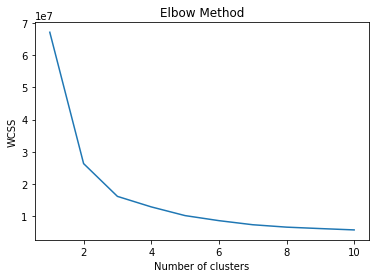

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Chosen k value: 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
X['status']=kmeans.labels_

In [ ]:
X['status'].value_counts()

0    27430
1      499
2      101
Name: status, dtype: int64

In [ ]:
y=X['status']
X.drop('status', axis=1, inplace=True)

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
Xcol=X.columns
X=pd.DataFrame(X_res, columns=Xcol)

In [ ]:
y = pd.DataFrame(y_res, columns=['status'])
y.value_counts()

status
2         27430
1         27430
0         27430
dtype: int64

In [ ]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
# Training a basal random forest model
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Feature importance
rf_predictions = model.predict(X_test)
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

issue_comment_count     0.426869
number_of_pulls         0.164813
issue_author_count      0.159860
number_of_pushes        0.075941
number_of_forks         0.074096
number_of_Bookmarks     0.060343
year                    0.022838
commit_author_count     0.006551
month                   0.004266
commit_comment_count    0.002995
day                     0.001429
number_of_issues        0.000000
dtype: float64

# Commit related feature extraction using GITHUB RESTful API

* Created a new github account to generate **Access Token** which is saved in the session.py file along with the **USERNAME**. These credententials are used to make calls to the REST API

In [6]:
import os
os.chdir('/content/drive/My Drive/Cloudbakers/')

In [7]:
import json
import requests
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import config

In [8]:
github_api = "https://api.github.com"
gh_session = requests.Session()
gh_session.auth = (config.GITHUB_USERNAME, config.GITHUB_TOKEN)

In [9]:
url = github_api + '/repos/apache/spark/commits'
commits = gh_session.get(url = url)
commits_json = commits.json()

In [130]:
def commits_of_repo_github(repo, owner, api):
    commits = []
    next = True
    i = 1
    while next == True:
        url = api + '/repos/{}/{}/commits?page={}&per_page=100'.format(owner, repo, i)
        commit_pg = gh_session.get(url = url)
        commit_pg_list = [dict(item, **{'repo_name':'{}'.format(repo)}) for item in commit_pg.json()]    
        commit_pg_list = [dict(item, **{'owner':'{}'.format(owner)}) for item in commit_pg_list]
        commits = commits + commit_pg_list
        if 'Link' in commit_pg.headers:
            if 'rel="next"' not in commit_pg.headers['Link']:
                next = False
        i = i + 1
    return commits

In [132]:
def create_commits_df(repo, owner, api):
    commits_list = commits_of_repo_github(repo, owner, api)
    return pd.json_normalize(commits_list)

In [103]:
commitdf=create_commits_df('spark', 'apache', github_api)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
commitdf

,sha,node_id,url,html_url,comments_url,parents,repo_name,owner,commit.author.name,commit.author.email,commit.author.date,commit.committer.name,commit.committer.email,commit.committer.date,commit.message,commit.tree.sha,commit.tree.url,commit.url,commit.comment_count,commit.verification.verified,commit.verification.reason,commit.verification.signature,commit.verification.payload,author.login,author.id,author.node_id,author.avatar_url,author.gravatar_id,author.url,author.html_url,author.followers_url,author.following_url,author.gists_url,author.starred_url,author.subscriptions_url,author.organizations_url,author.repos_url,author.events_url,author.received_events_url,author.type,author.site_admin,committer.login,committer.id,committer.node_id,committer.avatar_url,committer.gravatar_id,committer.url,committer.html_url,committer.followers_url,committer.following_url,committer.gists_url,committer.starred_url,committer.subscriptions_url,committer.organizations_url,committer.repos_url,committer.events_url,committer.received_events_url,committer.type,committer.site_admin,author,committer
0,584f90c82e8e47cdcaab50f95e6c709f460cd789,MDY6Q29tbWl0MTcxNjU2NTg6NTg0ZjkwYzgyZThlNDdjZG...,https://api.github.com/repos/apache/spark/comm...,https://github.com/apache/spark/commit/584f90c...,https://api.github.com/repos/apache/spark/comm...,[{'sha': '57ed5a829b7dd8c92e5dfb7bb96373c8f464...,spark,apache,Max Gekk,max.gekk@gmail.com,2020-10-07T00:29:30Z,HyukjinKwon,gurwls223@apache.org,2020-10-07T00:29:30Z,[SPARK-33067][SQL][TESTS][FOLLOWUP] Check erro...,94f4dec1787fe51f7b2e358611bb2ed1869cdce3,https://api.github.com/repos/apache/spark/git/...,https://api.github.com/repos/apache/spark/git/...,0,False,unsigned,None,None,MaxGekk,1580697.0,MDQ6VXNlcjE1ODA2OTc=,https://avatars1.githubusercontent.com/u/15806...,,https://api.github.com/users/MaxGekk,https://github.com/MaxGekk,https://api.github.com/users/MaxGekk/followers,https://api.github.com/users/MaxGekk/following...,https://api.github.com/users/MaxGekk/gists{/gi...,https://api.github.com/users/MaxGekk/starred{/...,https://api.github.com/users/MaxGekk/subscript...,https://api.github.com/users/MaxGekk/orgs,https://api.github.com/users/MaxGekk/repos,https://api.github.com/users/MaxGekk/events{/p...,https://api.github.com/users/MaxGekk/received_...,User,False,HyukjinKwon,6477701.0,MDQ6VXNlcjY0Nzc3MDE=,https://avatars0.githubusercontent.com/u/64777...,,https://api.github.com/users/HyukjinKwon,https://github.com/HyukjinKwon,https://api.github.com/users/HyukjinKwon/follo...,https://api.github.com/users/HyukjinKwon/follo...,https://api.github.com/users/HyukjinKwon/gists...,https://api.github.com/users/HyukjinKwon/starr...,https://api.github.com/users/HyukjinKwon/subsc...,https://api.github.com/users/HyukjinKwon/orgs,https://api.github.com/users/HyukjinKwon/repos,https://api.github.com/users/HyukjinKwon/event...,https://api.github.com/users/HyukjinKwon/recei...,User,False,NaN,NaN
1,57ed5a829b7dd8c92e5dfb7bb96373c8f464246c,MDY6Q29tbWl0MTcxNjU2NTg6NTdlZDVhODI5YjdkZDhjOT...,https://api.github.com/repos/apache/spark/comm...,https://github.com/apache/spark/commit/57ed5a8...,https://api.github.com/repos/apache/spark/comm...,[{'sha': '0b326d532752fd4e05b08dd16c096f80afe7...,spark,apache,Liang-Chi Hsieh,viirya@gmail.com,2020-10-06T23:59:23Z,Dongjoon Hyun,dhyun@apple.com,2020-10-06T23:59:23Z,[SPARK-33007][SQL] Simplify named_struct + get...,f2a967e6acf721c7b6ee41b00a3a56405c3a4517,https://api.github.com/repos/apache/spark/git/...,https://api.github.com/repos/apache/spark/git/...,0,False,unsigned,None,None,viirya,68855.0,MDQ6VXNlcjY4ODU1,https://avatars1.githubusercontent.com/u/68855...,,https://api.github.com/users/viirya,https://github.com/viirya,https://api.github.com/users/viirya/followers,https://api.github.com/users/viirya/following{...,https://api.github.com/users/viirya/gists{/gis...,https://api.github.com/users/viirya/starred{/o...,https://api.github.com/users/viirya/subscriptions,https://api.github.com/users/vii

In [178]:
repo_id_name = pd.read_csv('repo_id_name.csv')
repo_id_name[['owner','repo_name']] = repo_id_name.repo_name.str.split("/",expand=True)

In [179]:
repo_id_name

,repoID,repo_name,owner
0,33628160,bson-rs,zonyitoo
1,143887688,jasper,tychoish
2,37991233,grip,tychoish
3,146502453,ftdc,tychoish
4,100294206,anser,tychoish
...,...,...,...
249,163867485,libmongocrypt,10gen
250,156630873,leafygreen-ui,10gen
251,27557391,mongo-php-library-prototype,10gen-labs
252,19514152,mongo-php-driver-prototype,10gen-labs


In [180]:
# This piece of code makes calls for all the repos in 'id' list
# dictionary might throw errors because of few empty github repos that's why exception handling in used.
# Making unions for all the repos with weekly timestamp

finalcommitdf=pd.DataFrame()

for i in range(0,len(repo_id_name)):
    try:
        commitdf=create_commits_df(repo_id_name.iloc[i].repo_name, repo_id_name.iloc[i].owner, github_api)
        commitdf1=commitdf[['sha','repo_name','owner','commit.committer.date','commit.committer.email']]
        commitdf1['commit.committer.date']=pd.to_datetime(commitdf1['commit.committer.date'])
        commitdf1.index=commitdf1['commit.committer.date']
        commitdf2 = pd.DataFrame()
        commitdf2['number_of_commits'] = commitdf1['sha'].resample('W').count()
        commitdf2['number_of_unique_committers'] = commitdf1['commit.committer.email'].resample('W').nunique()
        commitdf2['week'] = commitdf2.index
        commitdf2['repoID'] = repo_id_name.iloc[i].repoID
        commitdf2.reset_index(level=0, inplace=True)
        commitdf2.drop('index', axis=1, inplace=True)
        finalcommitdf = finalcommitdf.append(commitdf2, ignore_index=True)
        print(i)
    except:
        i+=1 #need to write query in this part to extract the data from Bigquery database for cases when repo extraction throws any exception
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
194
195
196
197
198
199
200
202
203
204
205
206
207
208
210
211
212
213
214
215
216
217
218
219
220
221


In [182]:
finalcommitdf.to_csv("commit_data_for_193_repos.csv")

Next few steps: Add commit related features/other features to our dataset=> proceed with modeling for feature importance => Decide weights and generate a linear score => Forecast the score for future time steps